<h1><center>ECUACIÓN LOGISTICA</center></h1>

La ecuacion diferencial logística
$\begin{eqnarray}
{dy\over dt}&=&y(a-y)\\
\end{eqnarray}
$
es un ejemplo clásico de una ecuación diferencial autónoma no lineal, que permite realizar un análisis sencillo de retrato fase

Nuestro objetivo es dar una descripción cualitativa de la ecuación, obteniendo su plano fase, las ceroclinas y una aproximación a la solución.

Primero mandaremos llamas a las paqueterias de Python para el análisis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ahora introduciremos la ecuación diferencial como una función de Python

In [7]:
def model(y,t):
    dydt = y*(a-y)
    return dydt

Ahora construiremos el campo de pendientes de la ecuación diferencial dando sus parámetros

In [13]:
a = 1
T = np.linspace(-1, 5, 20)
Y = np.linspace(-1, a + 1, 20)
Tp, Yp = np.meshgrid(T, Y)
dxdt = model(Yp,Tp)
dt = 0.5*np.ones(Yp.shape)
dy = dxdt * dt

Por último, graficaremos la solución para distintos valores de condiciones iniciales, de modo que pueda verse el comportamiento que se obtiene de un análisis cualitativo.

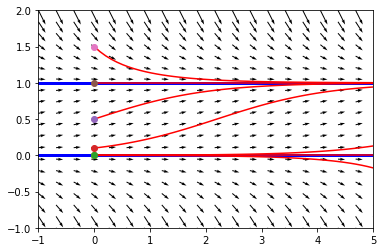

In [14]:
plt.figure()
Q = plt.quiver(Tp, Yp, dt, dy, color='k')
for cond_ini in [-0.001, 0, 0.001, 0.1, 0.5, 1, 1.5]:
    # ¿que pasa si añadimos -0.01?
    ts = np.linspace(0, 5, 50)
    y0 = [cond_ini]
    ys = odeint(model, y0, ts)
    plt.plot(ts, ys, 'r-') # path
    plt.plot([ts[0]], [ys[0]], 'o') # start
    plt.contour(Tp,Yp,dxdt, levels=[0],linewidths = 2.5, colors='b')
plt.show()